In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from visualization import line_plot_func
print(1)

1


In [11]:
# import sys
# import os

# # Get the absolute path of the parent directory and add it to sys.path
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../visualization/line_plot_func')))

# # Now import the module
# import line_plot

In [50]:
def boxplot(df, streams=None):
    """
    Create boxplots for selected data streams with automatic subfigure arrangement.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    streams (list): List of column names to plot. If None, plot all columns.
    """
    if streams is None:
        streams = df.columns.tolist()
    else:
        df = df[streams]
    
    num_streams = len(streams)
    rows = math.ceil(num_streams / 2)  # Define number of rows (2 subplots per row if possible)
    cols = min(2, num_streams)  # Define number of columns
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows), squeeze=False)
    axes = axes.flatten()  # Flatten axes for easy iteration
    
    for i, col in enumerate(streams):
        axes[i].boxplot(df[col].dropna(), vert=True)
        axes[i].set_title(f"Boxplot: {col}")
        axes[i].set_ylabel("Value")
        axes[i].grid()
    
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame 'data' with a DateTime index)
# choose_visualisation(data, streams=['stream1', 'stream2'], start_time='2025-01-01', end_time='2025-01-31', normalise=True)
# plot_boxplot(data, streams=['stream1', 'stream2'])


In [13]:
# Handling data
data = pd.read_csv('datasets/2881821.csv')
data['created_at'] = pd.to_datetime(data['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')  # Convert created_at to datetime
data.set_index('created_at', inplace=True)  # Set datetime as index

In [9]:
data.head(10)

,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
created_at,,,,,,,,,
2025-03-18 06:54:26,1,6.0,6.0,3.6,5.0,0.0,0.0,0.0,0.0
2025-03-18 06:54:43,2,6.0,4.0,2.4,3.0,10.0,10.0,10.0,10.0
2025-03-18 06:54:59,3,6.0,7.0,4.2,6.0,3.0,3.0,3.0,3.0
2025-03-18 06:55:16,4,9.0,4.0,3.6,5.0,13.0,13.0,13.0,13.0
2025-03-18 06:55:31,5,4.0,4.0,1.6,3.0,22.0,22.0,22.0,22.0
2025-03-18 06:55:47,6,6.0,5.0,3.0,8.0,31.0,31.0,31.0,31.0
2025-03-18 06:56:03,7,3.0,4.0,1.2,7.0,41.0,41.0,41.0,41.0
2025-03-18 06:56:20,8,4.0,5.0,2.0,3.0,51.0,51.0,51.0,51.0
2025-03-18 06:56:36,9,7.0,7.0,4.9,5.0,61.0,61.0,61.0,61.0


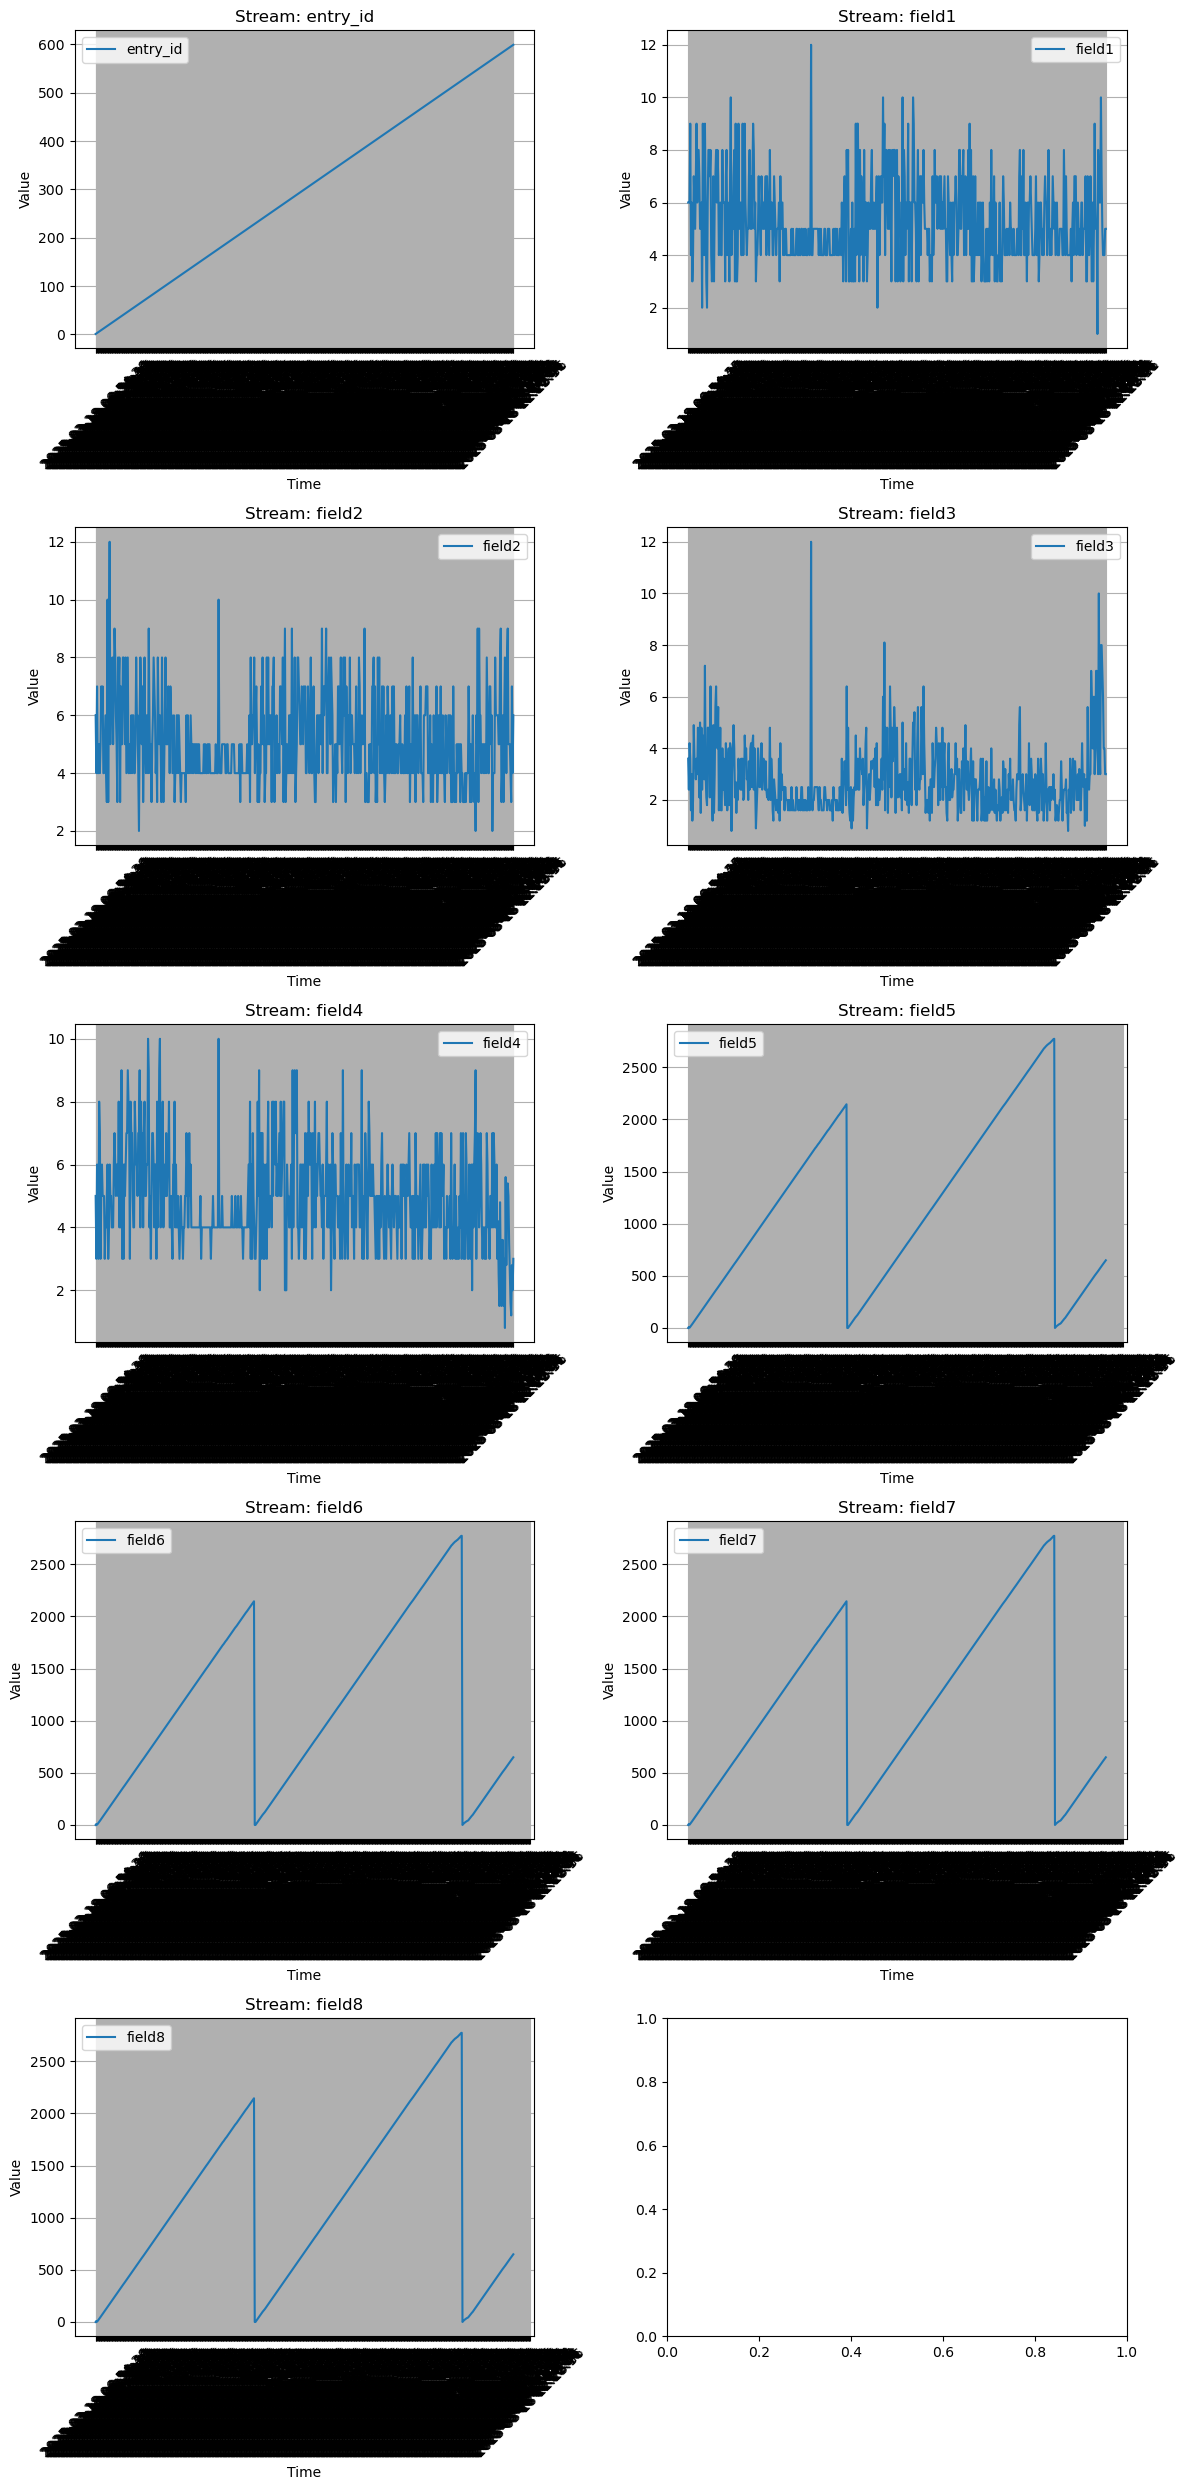

In [12]:
# Example usage 
line_plot_func.line_plot(data, streams=None, start_time='2025-03-18', end_time='2025-03-19', normalise=False)

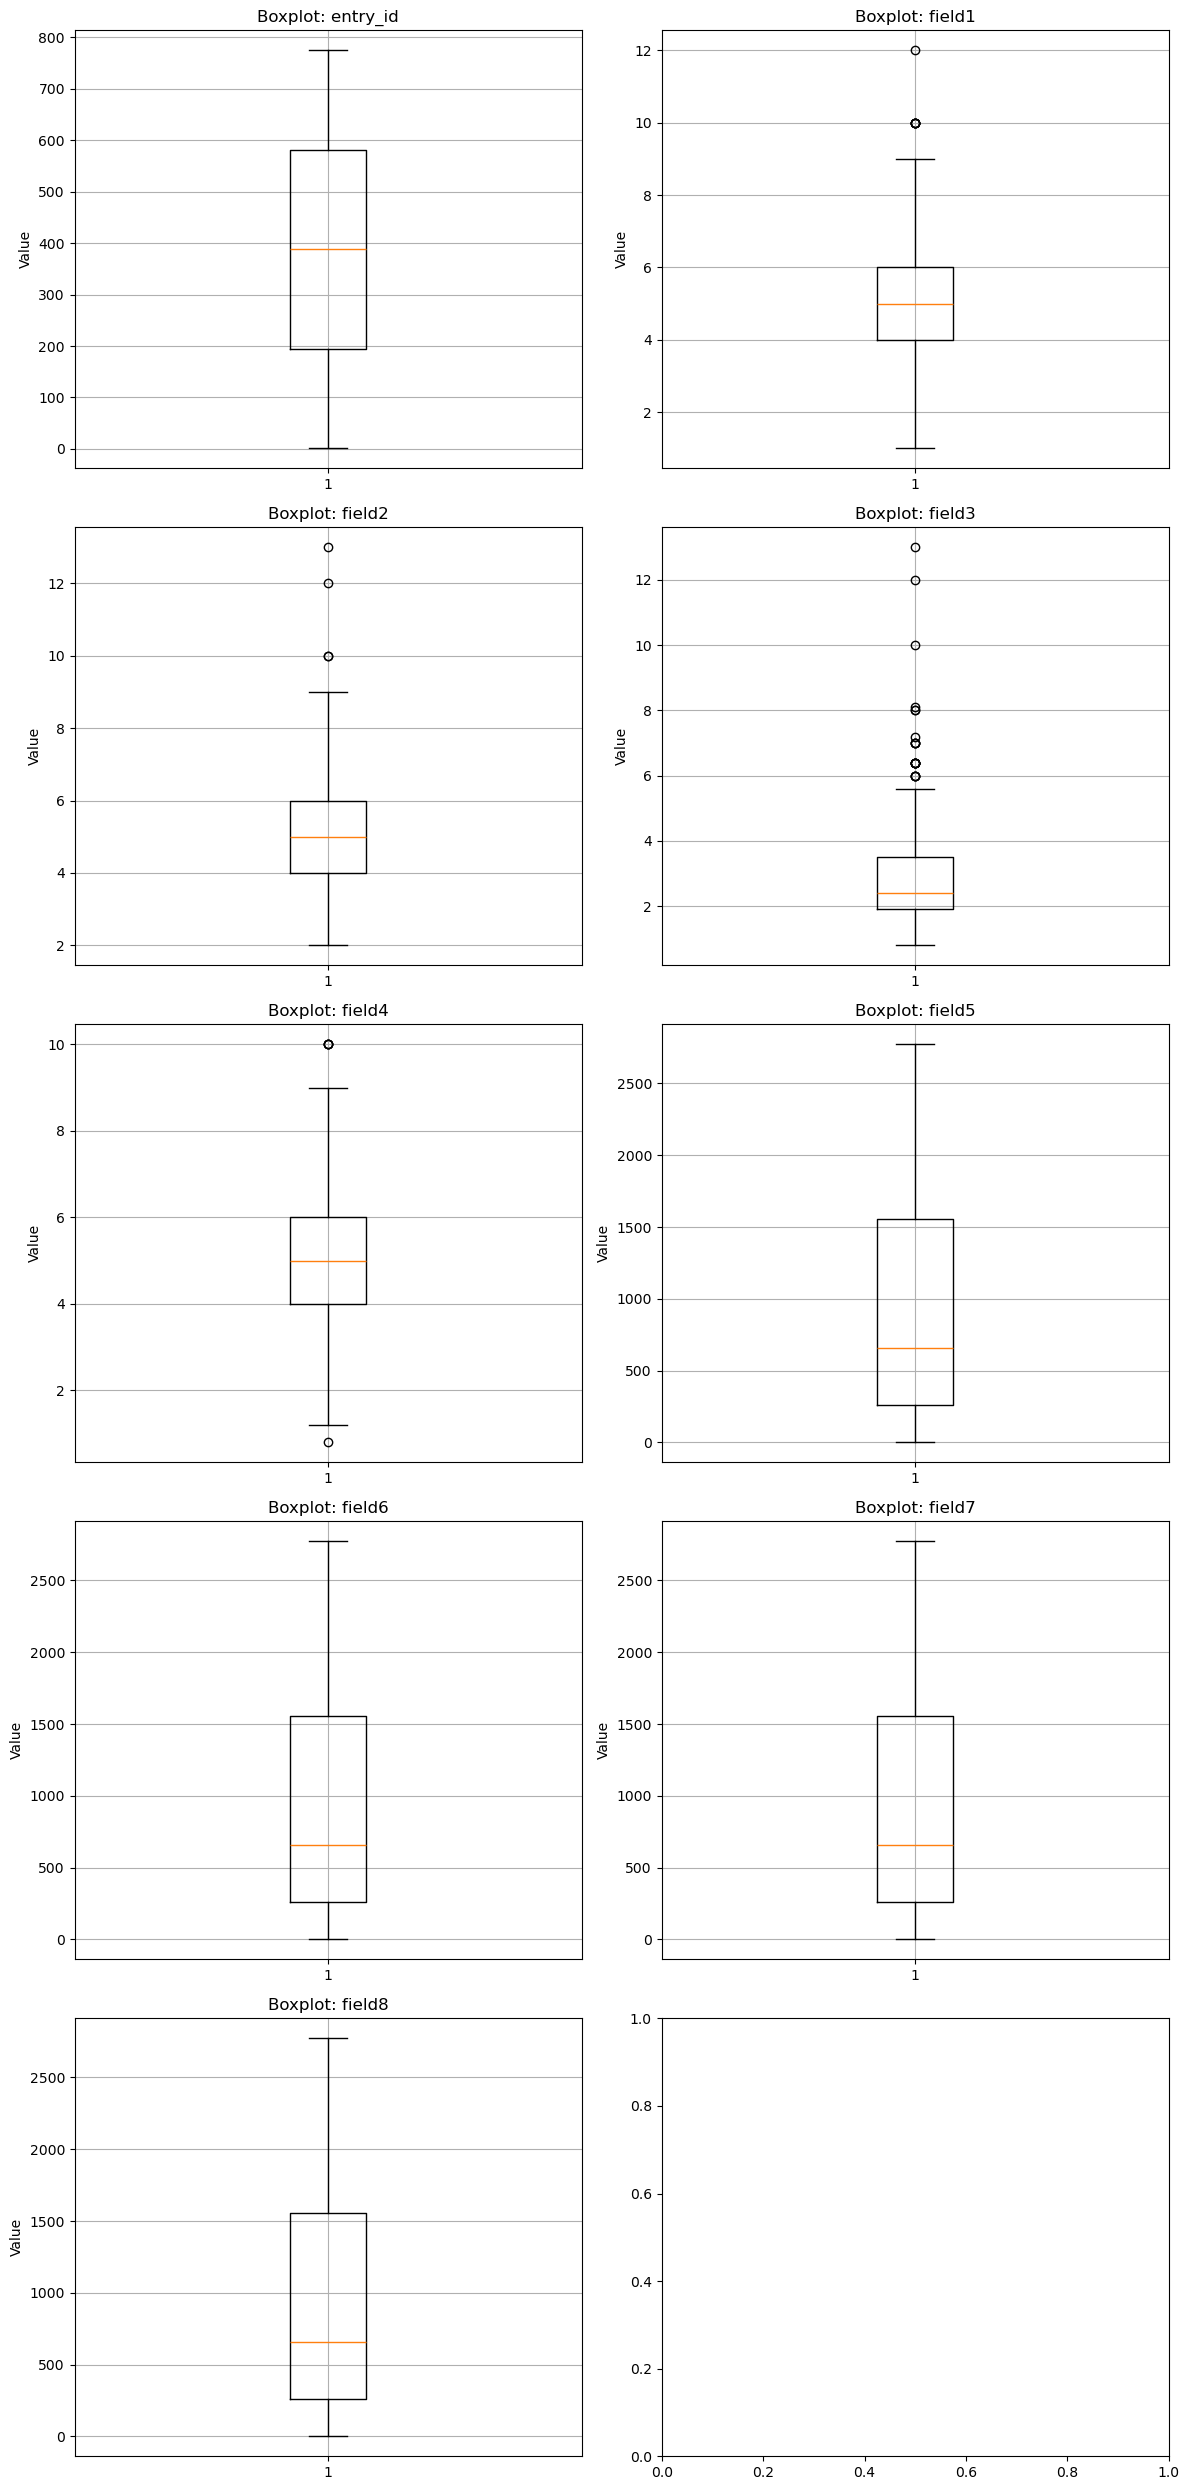

In [52]:
plot_boxplot(data, streams=None)